In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append(r"G:/My Drive/HỌC TẬP DUE/NNT_năm 4 kì 1/DW & DM/config")
import mdl_db_connection
import mdl_db_query



In [ ]:
excel_file_path = r"G:\My Drive\HỌC TẬP DUE\NNT_năm 4 kì 1\DW & DM\ETL_Sale week 2\ETL SALE PYTHON\SaleDataset.xlsx"

df_ORDER = pd.read_excel(excel_file_path, sheet_name="ORDER")
df_CUSTOMER = pd.read_excel(excel_file_path, sheet_name="CUSTOMER")
df_PRODUCT = pd.read_excel(excel_file_path, sheet_name="PRODUCT")

In [ ]:
mdx_1 = df_ORDER.groupby(['Region'])['Sales','Units', 'COGS'].sum()
print("Doanh số theo vùng miền")
print(mdx_1)

In [ ]:

# Vẽ biểu đồ cột xen kẽ
ax = mdx_1.plot(kind='bar', width=0.8, figsize=(10, 6), edgecolor='none')
plt.title('Biểu đồ cột xen kẽ cho Sales, Units, và COGS theo vùng miền')
plt.xlabel('Vùng miền')
plt.ylabel('Số liệu')
plt.legend(title='Chỉ số')
plt.xticks(rotation=0)

# Ẩn đường lưới
ax.grid(False)

# Hiển thị label bên trên cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
query = f"""
    select * from fact_table 
    inner join Dim_Product ON fact_table.[ProductID] = Dim_Product.[ProductID]
    inner join Dim_Customer on fact_table.[CustomerID] = Dim_Customer.[CustomerId]
    inner join Dim_Region on fact_table.[RegionID] = Dim_Region.[RegionID]
    inner join Dim_Time on fact_table.[DateID] = Dim_Time.[Date_ID]
"""
df_olap = mdl_db_query.print_query(query)
print(df_olap.head(5))

In [ ]:
print(df_olap.columns.tolist())

In [ ]:
mdx_2 = df_olap.groupby(['Year','Month','Region'])['Sales'].sum()
mdx_3 = df_olap.groupby(['Supplier','Product'])['Sales'].sum()
# print(mdx_2)
print(mdx_3)


.reset_index(): Sau khi tính tổng, kết quả là một Series hoặc DataFrame mới. Để đặt lại chỉ số của DataFrame kết quả và biến nó thành một DataFrame thông thường, chúng ta sử dụng .reset_index().

.rename(columns={'Sales': 'Total_Sales'}, inplace=True): Đoạn mã này đổi tên cột 'Sales' thành 'Total_Sales' trong DataFrame kết quả mdx_3. Chi tiết giải thích từng phần:

.rename(columns={'Sales': 'Total_Sales'}): Chúng ta sử dụng .rename() để đổi tên cột. Trong trường hợp này, chúng ta đổi tên cột 'Sales' thành 'Total_Sales'.
inplace=True: Thay đổi này được áp dụng trực tiếp vào DataFrame mdx_3 mà không cần gán lại kết quả vào một biến khác.

In [ ]:
# Truy vấn dữ liệu và đổi tên cột
mdx_3 = df_olap.groupby(['Supplier', 'Product'])['Sales'].sum().reset_index()
mdx_3.rename(columns={'Sales': 'Total_Sales'}, inplace=True)
print(mdx_3)

In [ ]:
mdx_4 = df_olap.groupby(['CustomerId'])['Units'].sum()
print(mdx_4)

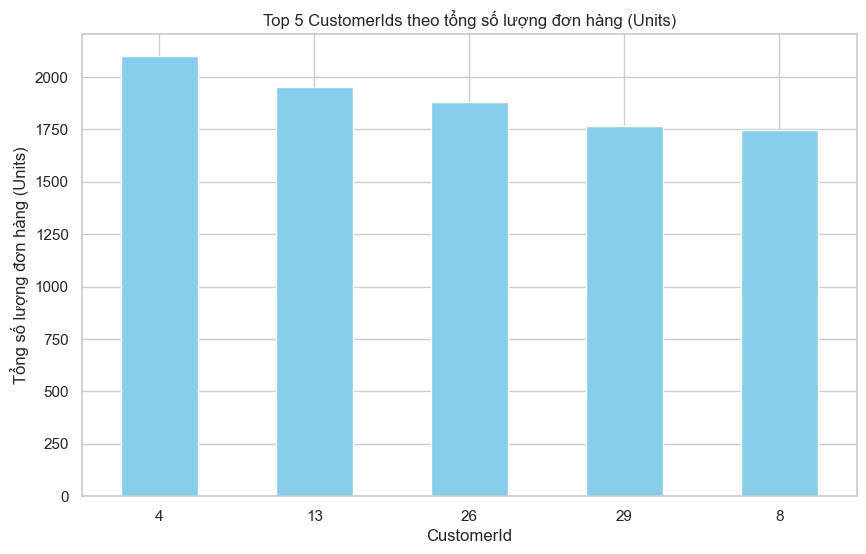

In [64]:
# Sắp xếp theo giá trị giảm dần và chỉ lấy top 5
top_5 = mdx_4.sort_values(ascending=False).head(5)

# Vẽ biểu đồ cột cho top 5
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 CustomerIds theo tổng số lượng đơn hàng (Units)')
plt.xlabel('CustomerId')
plt.ylabel('Tổng số lượng đơn hàng (Units)')
plt.xticks(rotation=0)
plt.show()